# Практикум к курсу "Стохастический анализ и моделирование"

 <font color=#7A378B> _Выполнила студентка 4 курса Сафонова Елизавета_</font>

- [x] Задание №7
- [x] Задание №8
- [x] Задание №9
- [x] Задание №10
- [x] Задание №11

In [304]:
import numpy as np
from tqdm import tqdm
from random import random
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2
import matplotlib 
import itertools 
import random

## Задание № 7

1. Методом случайного поиска найти минимальное значение функции $f$ на множестве $A=\left\{x_{1}, x_{2}: x_{1}^{2}+x_{2}^{2} \leq 1\right\}$, т. е. $y=\min\limits_{x \in A} f(x)$, где
$$f(x)=x_{1}^{3} \sin \left(\frac{1}{x_{1}}\right)+10 x_{1} x_{2}^{4} \cos \left(\frac{1}{x_{2}}\right)$$
при $x_{1} \neq 0$ и $x_{2} \neq 0$, функция доопределяется по непрерывности при $x_{1}=0$ или $x_{2}=0$

2. Методом имитации отжига найти минимальное значение функции Розенброка $g$ в пространстве $\mathbb{R}^{2}$, где
$$g(x)=\left(x_{1}-1\right)^{2}+100\left(x_{2}-x_{1}^{2}\right)^{2}$$

3. Оценить точность. Сравнить результаты со стандартными методами оптимизации.

<font color=#7A378B> Перейдём к полярным координатам: $x_1 = r\cos{\varphi},\ x_2 = r\sin{\varphi}$, $r \in [0, 1]$, $\varphi \in [0 , 2\pi]$. Заметим, что  $f(x_1,\ x_2) = f(x_1,\ -x_2)$, то есть функция чётна по переменной $x_2$. С учётом этого, получаем $\varphi \in [0,\ \pi]$.
$$r \sim U[0, 1]$$
$$\varphi \sim U[0,\ \pi]$$. <font>

In [ ]:
# Ищем минимум функции методом случайного поиска

f = lambda x, y: x**3 * np.sin(1 / x) + 10 * x * y**4 * np.cos(1 / y)

p = 0.99  # Уровень доверия
n = 1000000  # Число генераций

phi = np.random.uniform(0, np.pi, size = n)
r = np.sqrt(np.random.uniform(size = n))

x1 = r * np.cos(phi)
x2 = r * np.sin(phi)

res = np.min(f(x1, x2))
error = 22.17 * np.sqrt(p/n)

print("Минимальное значение = ", res)
print("Погрешность = ",  error)

Минимальное значение =  -1.2875191525435559
Погрешность =  0.022058871480653764


/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


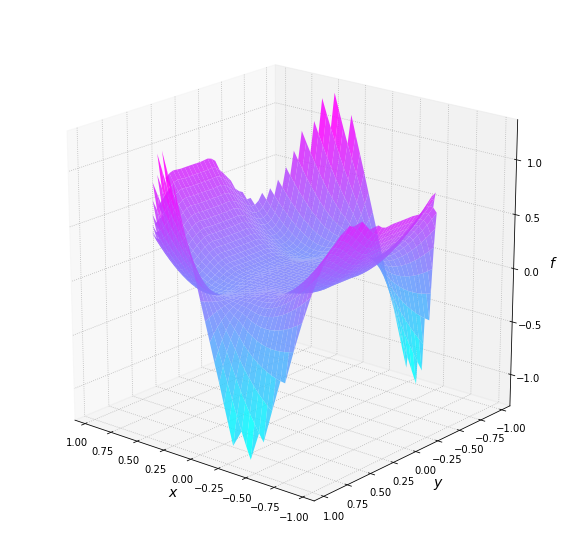

In [ ]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10, 10))

U = f(X, Y)
X[X**2 + Y**2 > 1] = np.inf
U[X**2 + Y**2 > 1] = 0

#index = np.where(f(x1, x2) == res)[0] 

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap = 'cool', alpha=0.85)
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)

ax.set_xlabel("x", fontname="Georgia", style="italic", fontsize=14)
ax.set_ylabel("y", fontname="Georgia", style="italic", fontsize=14)
ax.set_zlabel("f", fontname="Georgia", style="italic", fontsize=14)

#ax.scatter(x1[index], x2[index], res)
#ax.scatter(x1[index], -x2[index], res)

ax.view_init(20, 130)
plt.show()

In [ ]:
# Ищем минимум методом имитации отжига
 
Rosenbrock_function = lambda x, y: (x - 1)**2 + 100 * (y - x**2)**2

def annealing_method(t0, n):
    min = np.inf
    point = [0, 0]
    t_cur = t0
    for i in range(1, n + 1):
        [x_new, y_new] = np.random.randn(2) * np.sqrt(t_cur) + point
        min_cur = Rosenbrock_function(x_new, y_new)
        if min_cur >= min:
            p = np.exp((Rosenbrock_function(point[0], point[1]) - Rosenbrock_function(x_new, y_new)) / t_cur)
            alpha = random.uniform(0, 1)
            if alpha < p:
                point = [x_new, y_new]
                min = min_cur
        else:
            min = min_cur
            point = [x_new, y_new]
        t_cur = t0/i
    return min

In [ ]:
# Значения параметров
n = 1000
t0 = 1

In [ ]:
min_arr = np.zeros(n);
for i in range(n):
    min_arr = annealing_method(t0, n);
res_min = np.min(min_arr)
print("Минимальное значение = ", res_min)

Минимальное значение =  0.0006236527588480618


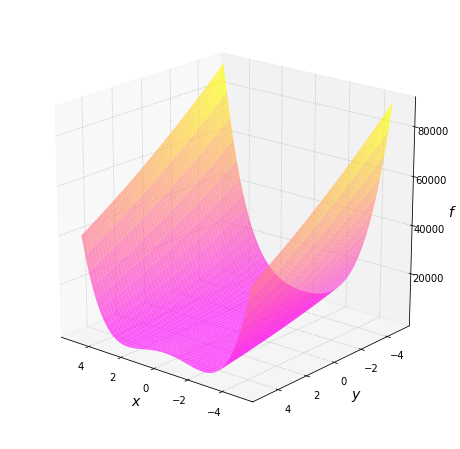

In [ ]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8, 8))

U = Rosenbrock_function(X, Y)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap = 'spring', alpha=0.65)
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)

ax.set_xlabel("x", fontname="Georgia", style="italic", fontsize=14)
ax.set_ylabel("y", fontname="Georgia", style="italic", fontsize=14)
ax.set_zlabel("f", fontname="Georgia", style="italic", fontsize=14)

ax.view_init(20, 130)
plt.show()

## Задание № 8

Применить метод Монте-Карло к решению первой краевой задачи для двумерного уравнения Лапласа в единичном круге:
$$
\left\{\begin{array}{l}
\Delta u=0,(x, y) \in D \\
\left.u\right|_{\partial D} = f(x, y) \\
u \in C^{2}(D), f \in C(\partial D) \\
D=\left\{x, y: x^{2}+y^{2} \leqslant 1\right\}
\end{array}\right.
$$
Для функции $f(x, y)=x^{2}-y^{2}$ найти аналитическое решение и сравнить с полученным по методу Монте-Карло.

<font color=#7A378B> Приведем аналитическое решение:
$$f(x,\ y) = x^2 - y^2 = r^2(\cos^2\varphi - \sin^2\varphi) = r^2\cos(2\varphi)$$
$$x^2+y^2 = r^2(\cos^2\varphi + \sin^2\varphi) = r^2 \leqslant 1$$
То есть рассматривается задача Дирихле внутри круга $r \leqslant 1$, тогда решение представимо в виде:
$$u(r,\ \varphi) = C_2 + \sum\limits_{k=1}^{\infty}r^k(A_k\cos(k\varphi)+B_k\sin(k\varphi))$$
$$\left.u\right|_{x^2+y^2 = 1} = \left.u\right|_{r = 1} = \left.r^2\right|_{r = 1}\cos(2\varphi) = \cos(2\varphi)$$
$$k = 2,\ A_k = 1,\ C_2 = 0,\ B_k = 0$$
Ответ: $u(r,\ \varphi) = r^2\cos(2\varphi)$ или $u(x,\ y) = x^2 - y^2$<font> 

In [ ]:
n = 50

In [ ]:
f = lambda x, y: x**2-y**2

m = n
count = 0
while m > 0:
    m = m // 10
    count += 1

h = 2 / n
x = np.zeros(n + 1)
y = np.zeros(n + 1)
x[0] = -1
y[0] = -1
for i in range(1, n + 1): # Для достижения максимальной точности в разбиения отрезка
    x[i] = round(x[i-1] + h, count)
    y[i] = round(y[i-1] + h, count)
X, Y = np.meshgrid(x, y)


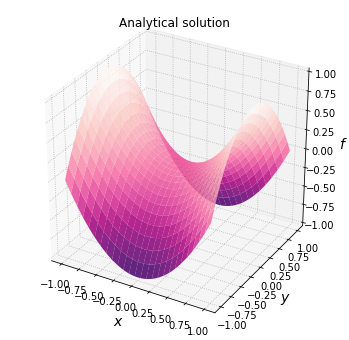

In [ ]:
font = {'family':'Times New Roman', 'size': 10}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, X**2 - Y**2, cmap=plt.cm.RdPu_r, alpha=0.85)
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)

ax.set_xlabel("x", fontname="Georgia", style="italic", fontsize=14)
ax.set_ylabel("y", fontname="Georgia", style="italic", fontsize=14)
ax.set_zlabel("f", fontname="Georgia", style="italic", fontsize=14)

plt.title('Analytical solution')
plt.show()

In [ ]:
D = lambda x, y: x**2 + y**2

check_arr = np.zeros((X.shape), dtype=int)
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if D(X[i][j], Y[i][j]) <= 1:
            if i == 0 or i == X.shape[0] - 1 or j == 0 or j == X.shape[0] - 1:
                check_arr[i][j] = 1 # Граничные точки
            else:
                if ((D(X[i + 1][j], Y[i + 1][j]) > 1) 
                    or (D(X[i - 1][j], Y[i - 1][j]) > 1) 
                    or (D(X[i][j + 1], Y[i][j + 1]) > 1) 
                    or (D(X[i][j - 1], Y[i][j - 1]) > 1)):
                    check_arr[i][j] = 1 # Граничные точки
                else:
                    check_arr[i][j] = -1 # Внутренние точки

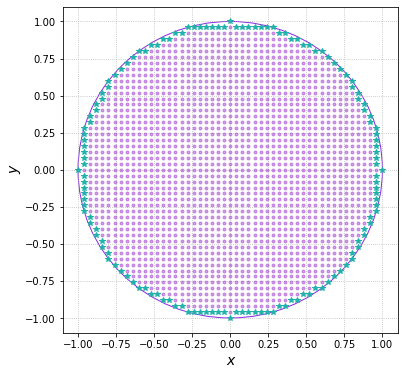

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(X[check_arr == 1], Y[check_arr == 1], "*", color = '#20B2AA')
plt.plot(X[check_arr == -1], Y[check_arr == -1], ".", color = '#9932CC', alpha = 0.45)
circle2 = plt.Circle((0, 0), 1, color='#8A2BE2', fill=False)
ax.add_patch(circle2)
plt.xlabel("x", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("y", fontname = "Georgia", style = "italic", fontsize = 14) 
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)

In [ ]:
N = 100
U = np.ones((X.shape[0], X.shape[0]))*np.inf
A = np.where(check_arr == 1) # Граничные точки
B = np.where(check_arr == -1) # Внутренние точки

for i, j in zip(A[0], A[1]):
    U[i][j] = f(X[i][j], Y[i][j])

for i, j in zip(B[0], B[1]): # Индексы внутренних точек
    U[i][j] = 0
    for k in range(N): # Для каждой точки моделируем случайное блуждание
        step_i = i
        step_j = j
        while check_arr[step_i][step_j] == -1: # Цикл пока не попадаем в граничную точку (пока находимся во внутренней точке)
            direction = np.random.choice(4, replace = False) # 0 - вниз, 1 - вправо, 2 - вверх, 3 - влево
            if direction == 0:
                step_i -= 1
            elif direction == 2:
                step_i += 1
            elif direction == 1:
                step_j += 1
            elif direction == 3:  
                step_j -= 1
        U[i][j] += f(X[step_i][step_j], Y[step_i][step_j])
    U[i][j] = U[i][j] / N
#for i in range(U.shape[0]):
#    print(U[i][:])

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


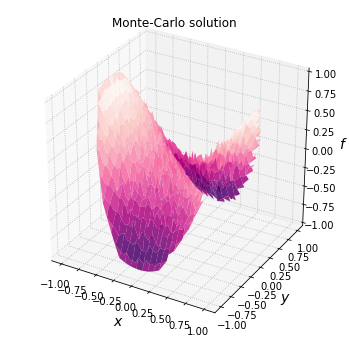

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
X_old = X
X[U == np.inf] = np.inf
U[U == np.inf] = 0
ax.plot_surface(X, Y, U, cmap=plt.cm.RdPu_r, alpha=0.85)
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)

ax.set_xlabel("x", fontname="Georgia", style="italic", fontsize=14)
ax.set_ylabel("y", fontname="Georgia", style="italic", fontsize=14)
ax.set_zlabel("f", fontname="Georgia", style="italic", fontsize=14)

plt.title('Monte-Carlo solution')

plt.show()

## Задание № 9

Рассмотреть два вида процессов:

* Винеровский процесс $W(t), t \in[0 ; 1], W(0)=0$.
* Процесс Орнштейна-Уленбека $X(t), t \in[0 ; 1], X(0)=X_{0}$, то есть стационарный марковский гауссовский процесс. Начальное значение $X_{0}$ генерируются случайным образом так, чтобы полученный процесс был стационарным.

Для данных гауссовских процессов:
1. Найти ковариационную функцию и переходные вероятности.
2. Моделировать независимые траектории процесса с данными переходными вероятностями методом добавления разбиения отрезка.
3. Построить график траектории, не соединяя точки ломаной, с целью получения визуально непрерывной линии.

In [109]:
def Wiener_process(t1, t2, W_t1, W_t2, alpha, epsilon):
    if t2 - t1 >= epsilon:
        t = (1 - alpha) * t1 + alpha * t2
        W_t = np.random.normal((1 - alpha) * W_t1 + alpha * W_t2, np.sqrt(alpha * (1 - alpha) * (t2 - t1)))

        W_new1, t_new1 = Wiener_process(t1, t, W_t1, W_t, alpha, epsilon)
        W_new2, t_new2 = Wiener_process(t, t2, W_t, W_t2, alpha, epsilon)

        W_ret = [W_t]
        W_ret.extend(W_new1)
        W_ret.extend(W_new2)
        t_ret = [t]
        t_ret.extend(t_new1)
        t_ret.extend(t_new2)
        
        return W_ret, t_ret
    else:
        return [W_t1], [t1] 

In [110]:
# Значения параметров
alpha = 0.2
epsilon = 1e-4

In [111]:
t0 = 0
t1 = 1
W_0 = 0
W_1 = np.random.normal(0, 1)

W, t = Wiener_process(t0, t1, W_0, W_1, alpha, epsilon)

In [112]:
arr = zip(t, W)
arr_sorted = sorted(arr, key=lambda x: x[0])

t_plot = [i[0] for i in arr_sorted]
W_plot = [i[1] for i in arr_sorted]

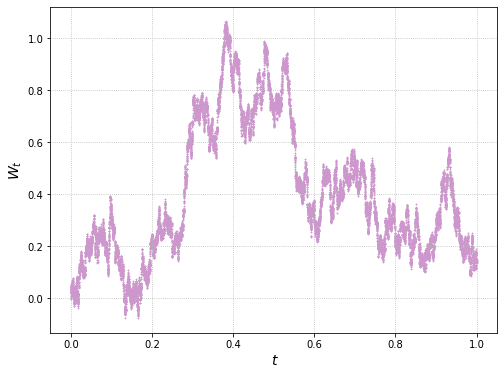

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(t_plot, W_plot, s = 0.3, color = '#CD96CD')
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
plt.xlabel("t", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("$W_t$", fontname="Georgia", style="italic", fontsize=14)
plt.show()

In [114]:
# Значения параметров
alpha = 0.37
epsilon = 1e-6
n = 20 # Количество процессов

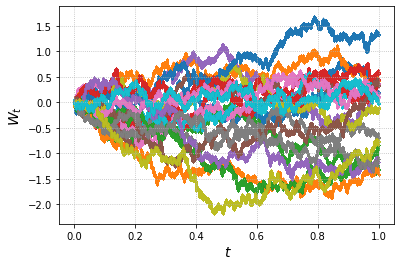

In [115]:
t0 = 0
t1 = 1
W_0 = 0
fig, ax = plt.subplots()
for i in range(n):
    W_1 = np.random.normal(0, 1)
    W, t = Wiener_process(t0, t1, W_0, W_1, alpha, epsilon)

    arr = zip(t, W)
    arr_sorted = sorted(arr, key=lambda x: x[0])

    t_plot = [i[0] for i in arr_sorted]
    W_plot = [i[1] for i in arr_sorted]
    ax.scatter(t_plot, W_plot, s = 0.1)
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
ax.set_xlabel("t", fontname = "Georgia", style="italic", fontsize = 14)
ax.set_ylabel("$W_t$", fontname="Georgia", style="italic", fontsize=14)
plt.show()

In [116]:
def Ornstein_Uhlenbeck_process(t1, t2, OU_t1, OU_t2, epsilon, sigma, lambda_par):
    if t2 - t1 >= epsilon:
        t = (t1 + t2)/2

        OU_t = np.random.normal((OU_t1 + OU_t2) * np.exp(-lambda_par * (t2 - t1) / 2) / (1 + np.exp (-lambda_par * (t2 - t1))),
                               sigma * np.sqrt((1 - np.exp(-lambda_par * (t2 - t1))) / (1 + np.exp (-lambda_par * (t2 - t1)))))

        OU_new1, t_new1 = Ornstein_Uhlenbeck_process(t1, t, OU_t1, OU_t, epsilon, sigma, lambda_par)
        OU_new2, t_new2 = Ornstein_Uhlenbeck_process(t, t2, OU_t, OU_t2, epsilon, sigma, lambda_par)

        OU_ret = [OU_t]
        OU_ret.extend(OU_new1)
        OU_ret.extend(OU_new2)
        t_ret = [t]
        t_ret.extend(t_new1)
        t_ret.extend(t_new2)
        return OU_ret, t_ret
    else:
        return [OU_t1], [t1] 
    

In [117]:
# Значения параметров
epsilon = 1e-6
sigma = 3
lambda_par = 6

In [118]:
t0 = 0
t1 = 1
OU_0 = np.random.normal(0, sigma)
OU_1 = np.random.normal(OU_0 * np.exp(-lambda_par * t1), sigma * np.sqrt(1 - np.exp(-2 * lambda_par * t1)))
OU, t = Ornstein_Uhlenbeck_process(t0, t1, OU_0, OU_1, epsilon, sigma, lambda_par)

In [121]:
arr = zip(t, OU)
arr_sorted = sorted(arr, key=lambda x: x[0])

t_plot = [i[0] for i in arr_sorted]
OU_plot = [i[1] for i in arr_sorted]

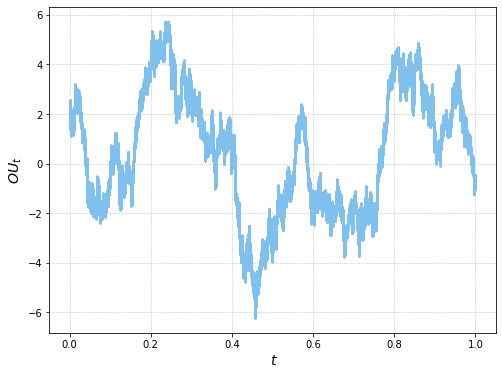

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(t_plot, OU_plot, s = 0.3, color = '#7EC0EE')
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
plt.xlabel("t", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("$OU_t$", fontname="Georgia", style="italic", fontsize=14)
plt.show()

In [123]:
# Значения параметров
epsilon = 1e-5
sigma = 0.5
lambda_par = 2
n = 10

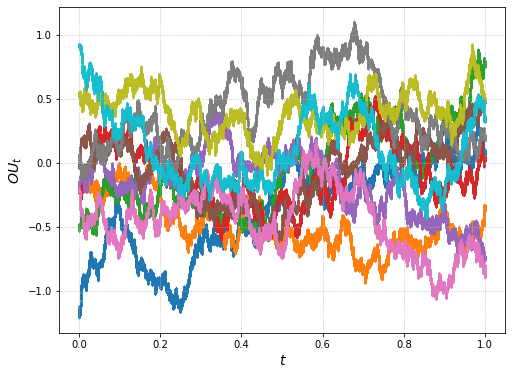

In [124]:
t0 = 0
t1 = 1
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n):
    OU_0 = np.random.normal(0, sigma)
    OU_1 = np.random.normal(OU_0 * np.exp(-lambda_par * t1), sigma * np.sqrt(1 - np.exp(-2 * lambda_par * t1)))
    OU, t = Ornstein_Uhlenbeck_process(t0, t1, OU_0, OU_1, epsilon, sigma, lambda_par)

    arr = zip(t, OU)
    arr_sorted = sorted(arr, key=lambda x: x[0])

    t_plot = [i[0] for i in arr_sorted]
    OU_plot = [i[1] for i in arr_sorted]
    ax.scatter(t_plot, OU_plot, s=0.2)
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
plt.xlabel("t", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("$OU_t$", fontname="Georgia", style="italic", fontsize=14)
plt.show()

## Задание № 10

Произвести фильтрацию одномерного процесса Орнштейна-Уленбека:
1. Используя генератор белого шума, добавить случайную ошибку с известной дисперсией к реализации процесса Орнштейна-Уленбека.
2. При помощи одномерного фильтра Калмана оценить траекторию процесса по зашумленному сигналу. Параметры процесса и белого шума считать известными.
3. Рассмотреть случай, когда шум
* Является гауссовским.
* Имеет распределение Коши.

In [243]:
r = 0.3
alpha = 0.7
epsilon = 1e-4
sigma = 2
lambda_par = 2

In [244]:
t0 = 0
t1 = 1
OU_0 = np.random.normal(0, sigma)
OU_1 = np.random.normal(OU_0 * np.exp(-lambda_par * t1), sigma * np.sqrt(1 - np.exp(-2 * lambda_par * t1)))
OU, t = Ornstein_Uhlenbeck_process(t0, t1, OU_0, OU_1, epsilon, sigma, lambda_par)

arr = zip(t, OU)
arr_sorted = sorted(arr, key=lambda x: x[0])

t = [i[0] for i in arr_sorted]
OU = [i[1] for i in arr_sorted]

v = np.random.normal(0, r, len(OU))
OU_new = OU + v

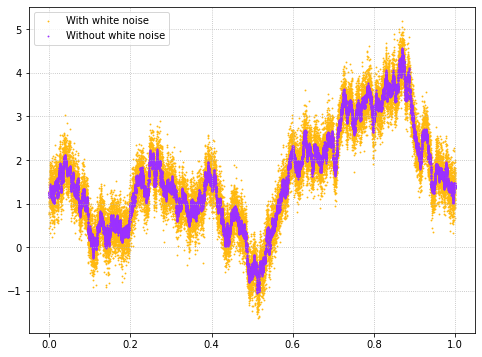

In [245]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(t, OU_new, s = 0.7, color = '#FFB90F', label="With white noise")
ax.scatter(t, OU, s = 0.7, color = '#9B30FF', label="Without white noise")
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.legend()
plt.grid(True)

In [246]:
a = np.exp(-lambda_par * (t[1]-t[0]))
q = sigma**2 * (1 - a**2)
res = np.zeros(len(OU))
R = np.zeros(len(OU))
res[0] = OU_new[0]
R[0] = r**2
for i in range(len(OU)):
      temp_res = a * res[i - 1]
      temp_R = q + a**2 * R[i - 1]
      R[i] = r**2 * temp_R / (r**2 + temp_R)
      res[i] = r**2 * temp_res / (r**2 + temp_R) + temp_R * OU_new[i]/(temp_R + r**2)


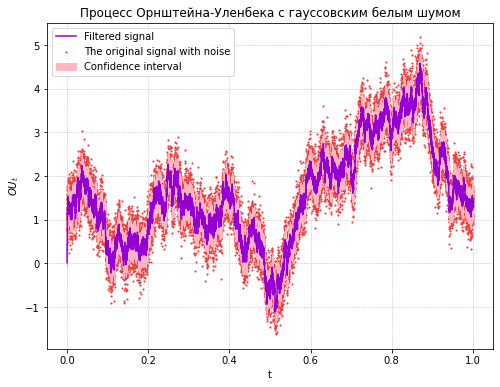

In [248]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t, res, label="Filtered signal", color=	'#9400D3')
ax.scatter(t, OU_new, s=1.2, label="The original signal with noise", color='#EE3B3B')
ax.fill_between(t, res - 3*np.sqrt(R), res + 3*np.sqrt(R), color='#FFB6C1', label="Confidence interval")
plt.xlabel("t")
plt.ylabel("$OU_t$")
plt.legend()
plt.rc('grid', linestyle=":", color='#B5B5B5')
ax.set_title("Процесс Орнштейна-Уленбека с гауссовским белым шумом")
plt.grid(True)
plt.legend()
plt.show()

In [282]:
r = 0.1
epsilon = 1e-3
sigma = 2
lambda_par = 0.6

In [283]:
t0 = 0
t1 = 1
OU_0 = np.random.normal(0, sigma)
OU_1 = np.random.normal(OU_0 * np.exp(-lambda_par * t1), sigma * np.sqrt(1 - np.exp(-2 * lambda_par * t1)))
OU, t = Ornstein_Uhlenbeck_process(t0, t1, OU_0, OU_1, epsilon, sigma, lambda_par)

arr = zip(t, OU)
arr_sorted = sorted(arr, key=lambda x: x[0])

t = [i[0] for i in arr_sorted]
OU = [i[1] for i in arr_sorted]

In [284]:
def cauchy(a, b, n):
    y = np.random.random(size = n)
    x = a + b * np.tan(np.pi * (y - 0.5))
    return x

In [285]:
v = cauchy(0, r, len(OU))
OU_new = OU + v

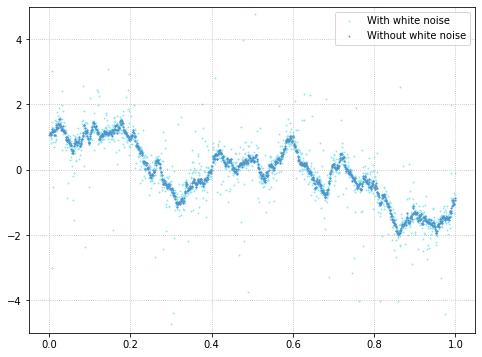

In [290]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(t, OU_new, s = 0.7, color = '#8EE5EE', label="With white noise")
ax.scatter(t, OU, s = 0.7, color = '#4F94CD', label="Without white noise")
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.legend()
plt.ylim([-5, 5])
plt.grid(True)

In [287]:
a = np.exp(-lambda_par * (t[1]-t[0]))
q = sigma**2 * (1 - a**2)
res = np.zeros(len(OU))
R = np.zeros(len(OU))
res[0] = OU_new[0]
R[0] = r**2
for i in range(len(OU)):
      temp_res = a * res[i - 1]
      temp_R = q + a**2 * R[i - 1]
      R[i] = r**2 * temp_R / (r**2 + temp_R)
      res[i] = r**2 * temp_res / (r**2 + temp_R) + temp_R * OU_new[i]/(temp_R + r**2)

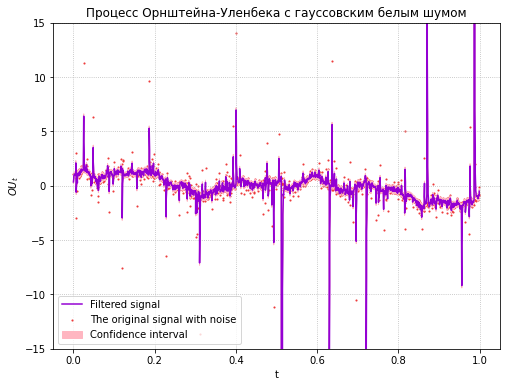

In [300]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t, res, label="Filtered signal", color=	'#9400D3')
ax.scatter(t, OU_new, s=1.2, label="The original signal with noise", color='#EE3B3B')
ax.fill_between(t, res - 3*np.sqrt(R), res + 3*np.sqrt(R), color='#FFB6C1', label="Confidence interval")
plt.xlabel("t")
plt.ylabel("$OU_t$")
plt.legend()
plt.rc('grid', linestyle=":", color='#B5B5B5')
ax.set_title("Процесс Орнштейна-Уленбека с гауссовским белым шумом")
plt.grid(True)
plt.ylim([-15, 15])
plt.legend()
plt.show()

## Задание № 11

Построить двумерное пуассоновское поле, отвечающее сложному пуассоновскому процессу:
1. Первая интерпретация: система массового обслуживания. При этом, первая координата поля - время поступления заявки в СМО (равномерное распределение), вторая - время ее обслуживания (распределение $\chi^{2}$ с 10 степенями свободы).
2. Вторая интерпретация: система массового обслуживания с циклической интенсивностью $\lambda(1+\cos (t))$ и единичными скачками. Свести данную задачу моделирования неоднородного пуассоновского процесса при помощи метода Льюиса и Шедлеара к моделированию двумерного пуассоновского поля, где первая координата имеет равномерное распределение, а вторая - распределение Бернулли.
3. Третья интерпретация: работа страховой компании. Первая координата - момент наступления страхового случая (равномерное распределение), вторая координата - величина ущерба (распределение Парето). Поступление капитала по времени линейно со скоростью $c>0$, начальный капитал $W>0$.
4. Для каждой системы рассмотреть всевозможные случаи поведения системы в зависимости от значения параметров

In [427]:
def exponential_generator(lambda_value, n):
    y = np.random.random(size = n)
    x = (-1/lambda_value)*np.log(y)
    return x

In [428]:
def QS(lambda_value, n):
    t = exponential_generator(lambda_value, n)
    t = np.cumsum(t)
    s = chi2.rvs(10, size=n)
    Q = np.zeros(n)
    N = np.zeros(n)
    Q[0] = t[0] + s[0]
    for i in range(1, n):
        N[i] = np.sum(t[i] < Q[:i])
        Q[i] = t[i] + max(0, Q[i - 1] - t[i]) + s[i]
    return t, N

In [429]:
lambda_value = 0.05
n = 200
t, N = QS(lambda_value, n)

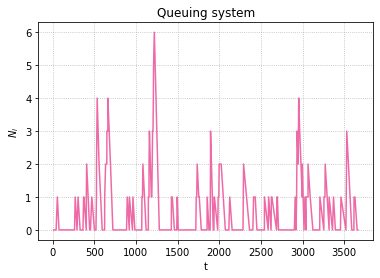

In [431]:
plt.plot(t, N, color='#EE6AA7')
plt.xlabel("t") 
plt.ylabel("$N_i$")
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.title("Queuing system")
plt.grid(True)
plt.show()

In [432]:
lambda_value = 0.1
n = 200
t, N = QS(lambda_value, n)

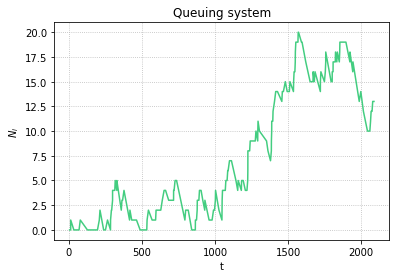

In [433]:
plt.plot(t, N, color='#43CD80')
plt.xlabel("t") 
plt.ylabel("$N_i$")
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.title("Queuing system")
plt.grid(True)
plt.show()

In [434]:
lambda_value = 0.2
n = 200
t, N = QS(lambda_value, n)

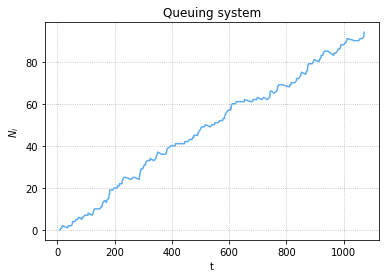

In [435]:
plt.plot(t, N, color='#5CACEE')
plt.xlabel("t") 
plt.ylabel("$N_i$")
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.title("Queuing system")
plt.grid(True)
plt.show()

In [436]:
def bernoulli(p, n):
    x = (np.random.uniform(size = n) <= p) * 1
    return x

In [437]:
def cyclic_intensity(lamda_value, n):
    t = np.zeros(n)
    Q = np.zeros(n)
    k = 0
    temp = 0
    while k < n - 1:
        temp += exponential_generator(2*lambda_value, 1)
        ksi = bernoulli((1 + np.cos(temp))/2, 1)
        if ksi == 1:
            t[k + 1] = temp
            Q[k + 1] = k
            k += 1
    return Q, t

In [438]:
n = 1000

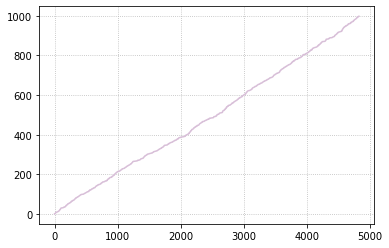

In [440]:
lamda_value = 0.5

fig = plt.subplots()
Q, t = cyclic_intensity(lamda_value, n) 
plt.plot(t, Q, color = '#D8BFD8')
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
plt.show()

In [496]:
def Pareto(x_m, k, n):
    x = np.random.uniform(size = n)
    y = x_m / (1 - x)**(1 / k)
    return y

In [512]:
def capital(W0, lambda_value, c, k, x_m, n):
    t = exponential_generator(lambda_value, n)
    t = np.cumsum(t)
    s = Pareto(x_m, k, n)
    s = np.cumsum(s)
    W = W0 * np.ones(n) + c * t - s
    index = np.where(W < 0)[0]
    if len(index) != 0:
        W[index[0]:] = 0
    return t, W

In [530]:
W0 = 100
n = 1000
lambda_value = 0.9
k = 3
x_m = 5
c = lambda_value * k * x_m / (k - 1) + 5

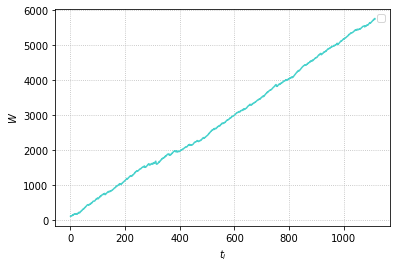

In [531]:
t, W = capital(W0, lambda_value, c, k, x_m, n)
plt.plot(t, W, color = '#48D1CC')
plt.xlabel("$t_i$")
plt.ylabel("$W$")
plt.legend()
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
plt.show()

In [532]:
W0 = 100
n = 1000
lambda_value = 0.9
k = 3
x_m = 5
c = lambda_value * k * x_m / (k - 1) - 1

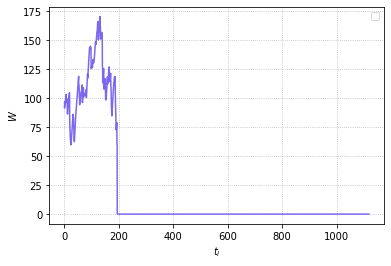

In [536]:
t, W = capital(W0, lambda_value, c, k, x_m, n)
plt.plot(t, W, color = '#7B68EE')
plt.xlabel("$t_i$")
plt.ylabel("$W$")
plt.legend()
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
plt.show()

In [537]:
W0 = 100
n = 1000
lambda_value = 0.9
k = 3
x_m = 5
c = lambda_value * k * x_m / (k - 1)

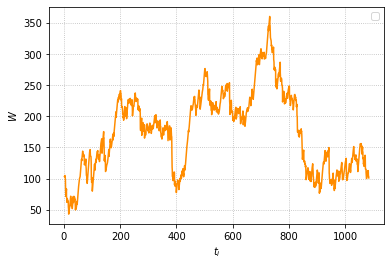

In [540]:
t, W = capital(W0, lambda_value, c, k, x_m, n)
plt.plot(t, W, color = '#FF8C00')
plt.xlabel("$t_i$")
plt.ylabel("$W$")
plt.legend()
plt.rc('grid', linestyle=":", color='#B5B5B5')
plt.grid(True)
plt.show()